In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse


In [3]:
print(np.__version__)

2.2.1


In [2]:
lx,ly,lz = 8, 8, 8

rho = 1
dt = 1
dx = 1
A = None
sA = None


In [3]:
# helpers
def grid_to_row_col(i:int,j:int,k:int) -> int:
    return i + lx * j + lx * ly * k
def is_boundary(i, j, k): # check if cell belongs to the boundary
    if(i == -1 or i == lx or j == -1 or j == ly or k == -1 or k == lz):
        return True
    
    return False


## Discretize Poisson Problem(Non-Sparse Version)

In [513]:

# initialize A matrix      
A = np.zeros((lx * ly * lz, lx * ly * lz))




# iterate over all points in 3d grid
for k in range(0, lz):
    for j in range(0, ly):
        for i in range(0, lx):
            row = grid_to_row_col(i, j, k)
            col = row
            A[row, col] = 6
            
            # impose neumann boundary conditions
            if(not is_boundary(i + 1, j, k)):
                A[row, grid_to_row_col(i + 1, j, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i - 1, j, k)):
                A[row, grid_to_row_col(i - 1, j, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i, j + 1, k)):
                A[row, grid_to_row_col(i, j + 1, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i, j - 1, k)):
                A[row, grid_to_row_col(i, j - 1, k)] = -1
            else:
                A[row,col] -= 1
            
            if(not is_boundary(i, j, k + 1)):
                A[row, grid_to_row_col(i, j, k + 1)] = -1
            else:
                A[row,col] -= 1
            
            if(not is_boundary(i, j, k - 1)):
                A[row, grid_to_row_col(i, j, k - 1)] = -1
            else:
                A[row,col] -= 1
            
# A = A + A.T - np.diag(np.diag(A)) # symmetrize A
print("Poisson Equation Matrix Complete") 

eps = 0
A = A + np.eye(A.shape[0]) * eps
sA = scipy.sparse.coo_matrix(A)
        


Poisson Equation Matrix Complete


In [98]:
A[0:10, 0:10]

array([[ 3., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  3.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., -1.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  5.]])

## Discretize Poisson Problem(Non-Sparse Version, Zero Flux BCs)

In [520]:
boundary_type = "zero_flux"
training = False

# initialize A matrix      
A = np.zeros((lx * ly * lz, lx * ly * lz))



# iterate over all points in 3d grid
for k in range(0, lz):
    for j in range(0, ly):
        for i in range(0, lx):
            row = grid_to_row_col(i, j, k)
            col = row
            
            
            factor = 1
            u, d, f, b, r, l = 1, 1, 1, 1, 1, 1
            # impose neumann boundary conditions
            if(is_boundary(i + 1, j, k)):
                r = 0
                l = 2
                factor *= 0.5
            elif(is_boundary(i - 1, j, k)):
                l = 0
                r = 2
                factor *= 0.5
            
            if(is_boundary(i, j + 1, k)):
                f = 0
                b = 2
                factor *= 0.5
            elif(is_boundary(i, j - 1, k)):
                b = 0
                f = 2
                factor *= 0.5
            
            if(is_boundary(i, j, k + 1)):
                u = 0
                d = 2
                factor *= 0.5
            elif(is_boundary(i, j, k - 1)):
                d = 0
                u = 2
                factor *= 0.5

            A[row, col] = 6 * factor
            if(r >= 1):
                A[row, grid_to_row_col(i + 1, j, k)] = -1 * factor * r
            if(l >= 1):
                A[row, grid_to_row_col(i - 1, j, k)] = -1 * factor * l
            if(f >= 1):
                A[row, grid_to_row_col(i, j + 1, k)] = -1 * factor * f
            if(b >= 1):
                A[row, grid_to_row_col(i, j - 1, k)] = -1 * factor * b
            if(u >= 1):
                A[row, grid_to_row_col(i, j, k + 1)] = -1 * factor * u
            if(d >= 1):
                A[row, grid_to_row_col(i, j, k - 1)] = -1 * factor * d



print("Poisson Equation Matrix Complete") 

sA = scipy.sparse.coo_matrix(A)
        

Poisson Equation Matrix Complete


In [573]:
print(A[0:10, 0:10])

[[ 0.75 -0.25  0.    0.    0.    0.    0.    0.   -0.25  0.  ]
 [-0.25  1.5  -0.25  0.    0.    0.    0.    0.    0.   -0.5 ]
 [ 0.   -0.25  1.5  -0.25  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.25  1.5  -0.25  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.25  1.5  -0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.25  1.5  -0.25  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.25  1.5  -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.25  0.75  0.    0.  ]
 [-0.25  0.    0.    0.    0.    0.    0.    0.    1.5  -0.5 ]
 [ 0.   -0.5   0.    0.    0.    0.    0.    0.   -0.5   3.  ]]


In [ ]:
# off of stack overflow, i dont trust it
def icholesky(a):
    n = a.shape[0]
    for k in range(n): 
        a[k,k] = np.sqrt(a[k,k])
        i_, = a[k+1:,k].nonzero() 
        if len(i_) > 0:
            i_= i_ + (k+1)
            a[i_,k] = a[i_,k]/a[k,k]
        for j in i_: 
            i2_, = a[j:n,j].nonzero()
            if len(i2_) > 0:
                i2_ = i2_ + j
                a[i2_,j]  = a[i2_,j] - a[i2_,k]*a[j,k]   


    return a

M = np.tril(icholesky(sA.toarray()))



## Discretize Poisson Problem(Sparse Version)

In [355]:
# allocate size of sparse containers based on expected number of non-zero entries
container_size = (lx - 2) * (ly - 2) * (lz - 2) * 7 + \
                 2 * 6 * ( (lx - 2) * (ly - 2) + (lx - 2) * (ly - 2) + (ly - 2) * (lz - 2)) + \
                 4 * 5 * (lx - 2 + ly - 2 + lz - 2) + \
                 4 * 8 

# init sparse containers
entries = np.zeros(container_size)
rows = np.zeros(container_size, dtype = np.int32)
cols = np.zeros(container_size, dtype = np.int32)

# iterate over all points in 3d grid
idx = 0
for k in range(0, lz):
    for j in range(0, ly):
        for i in range(0, lx):
            row = grid_to_row_col(i, j, k)
            col = row
            # A[row, col] = 6
            diag_val = 6 

            # impose neumann boundary conditions
            if(not is_boundary(i, j, k - 1)):
                cols[idx] = grid_to_row_col(i, j, k - 1)
                rows[idx] = row
                entries[idx] = -1
                idx += 1
            else:
                diag_val -= 1
            
            if(not is_boundary(i, j - 1, k)):
                cols[idx] = grid_to_row_col(i, j - 1, k)
                rows[idx] = row
                entries[idx] = -1
                idx += 1
            else:
                diag_val -= 1

            if(not is_boundary(i - 1, j, k)):
                cols[idx] = grid_to_row_col(i - 1, j, k)
                rows[idx] = row
                entries[idx] = -1
                idx += 1
            else:
                diag_val -= 1
            
            # fill central cell value
            cols[idx] = row
            rows[idx] = col
            entries[idx] = diag_val
            central_idx = idx
            idx += 1

            if(not is_boundary(i + 1, j, k)):
                cols[idx] = grid_to_row_col(i + 1, j, k)
                rows[idx] = row
                entries[idx] = -1
                idx += 1

            else:
                entries[central_idx] -= 1


            if(not is_boundary(i, j + 1, k)):
                cols[idx] = grid_to_row_col(i, j + 1, k)
                rows[idx] = row
                entries[idx] = -1
                idx += 1

            else:
                entries[central_idx] -= 1


            
            if(not is_boundary(i, j, k + 1)):
                cols[idx] = grid_to_row_col(i, j, k + 1)
                rows[idx] = row
                entries[idx] = -1
                idx += 1

            else:
                entries[central_idx] -= 1
            
sA = scipy.sparse.coo_matrix((entries, (rows, cols)))


In [208]:
def incomplete_cholesky(A):
    E = np.zeros(A.shape)
    n = A.shape[0]

    for k in range(n - 1):
        E[k, k] = np.sqrt(A[k,k])
        for j in range(k + 1, n):
            E[j, k] = A[k, j]/E[k, k]
        
        for i in range(k + 1, n):
            for j in range(i, n):
                if(A[i, j] != 0):
                    A[i, j] = A[i, j] - E[k, i] * E[k, j]
                
    E[-1, -1] = np.sqrt(A[-1, -1])    
    return E

E = incomplete_cholesky(A.copy())

print(A - E @ E)



[[ 4.44089210e-16 -1.00000000e+00 -1.00000000e+00  0.00000000e+00
  -1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  4.44089210e-16  0.00000000e+00 -1.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  4.44089210e-16 -1.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-6.66666667e-01  1.00000000e+00  1.00000000e+00  4.44089210e-16
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.44089210e-16 -1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-6.66666667e-01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  4.44089210e-16  0.00000000e+00 -1.00000000e+00]
 [-6.66666667e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  4.44089210e-16 -1.00000000e+00]
 [ 0.00000000e+00 -6.66666667e-01 -6.66666667e-01  1.00000000e+00
  -

## Save Matrix

In [272]:
matrix_fn = f"A_matrix_{lx}_{ly}_{lz}"
scipy.sparse.save_npz(f"{matrix_fn}.npz", sA)

# Load Matrix(if necessary)

In [273]:
if(A is None):
    A = scipy.sparse.load_npz(matrix_fn).tocsr()
    print(type(A))

## Numpy Eigenvalue & Eigenvector Computation

In [380]:
import scipy.linalg
Ae, Av = map(np.real, scipy.linalg.eigh(sA.toarray()))
# reorder eigen values 
ind = np.argsort(Ae)
nullspace = Av[:, 0]/np.linalg.norm(Av[:, 0])
Ae, Av = Ae[ind], Av.T[ind, :] # the rows are now eigenvectors
Ae, Av = Ae[1:], Av[1:]
Av = Av - np.outer((Av @ nullspace), nullspace)
# Ae, Av = Ae[ind], Av.T[ind, :] # the rows are now eigenvectors



In [381]:
Ae

array([ 0.15224093,  0.15224093,  0.15224093,  0.30448187,  0.30448187,
        0.30448187,  0.4567228 ,  0.58578644,  0.58578644,  0.58578644,
        0.73802737,  0.73802737,  0.73802737,  0.73802737,  0.73802737,
        0.73802737,  0.89026831,  0.89026831,  0.89026831,  1.17157288,
        1.17157288,  1.17157288,  1.23463314,  1.23463314,  1.23463314,
        1.32381381,  1.32381381,  1.32381381,  1.38687407,  1.38687407,
        1.38687407,  1.38687407,  1.38687407,  1.38687407,  1.53911501,
        1.53911501,  1.53911501,  1.75735931,  1.82041957,  1.82041957,
        1.82041957,  1.82041957,  1.82041957,  1.82041957,  1.97266051,
        1.97266051,  1.97266051,  1.97266051,  1.97266051,  1.97266051,
        2.        ,  2.        ,  2.        ,  2.15224093,  2.15224093,
        2.15224093,  2.15224093,  2.15224093,  2.15224093,  2.30448187,
        2.30448187,  2.30448187,  2.40620601,  2.40620601,  2.40620601,
        2.46926627,  2.46926627,  2.46926627,  2.58578644,  2.58

Largest Eigenvalue:  11.543277195067718
Last Element:  11.543277195067718
Last Eigenvector Rayleigh quotient:  11.54327719506772

Smallest Eigenvalue:  0.1522409349774266
First Element:  0.1522409349774266
Last Eigenvector Rayleigh quotient:  0.15224093497742647



Text(0.5, 1.0, 'Eigenvalues of A')

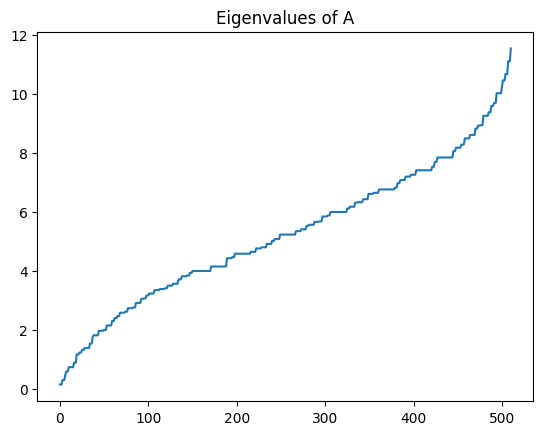

In [382]:
# sanity check that eigenvalues are in smallest to largest
print("Largest Eigenvalue: ", np.amax(Ae))
print("Last Element: ", Ae[-1])
v = Av[-1, :]
e = Ae[-1]
rq = (v @ A @ v) / (v @ v)
print("Last Eigenvector Rayleigh quotient: ", rq, end = 2*"\n")


print("Smallest Eigenvalue: ", np.amin(Ae))
print("First Element: ", Ae[0])
v = Av[0, :]
e = Ae[0]
rq = (v @ A @ v) / (v @ v)
print("Last Eigenvector Rayleigh quotient: ", rq, end = 2*"\n")


plt.plot(Ae)
plt.title("Eigenvalues of A")

# Construct the Training Vectors
### Construct training and testing vectors in the following form: $b^i = \frac{\sum^{m-1}_{j=0} c^i_j q_j}{\lVert \sum^{m-1}_{j=0} c^i_j q_j \rVert}$
### Sample coefficients from  $9\cdot \mathcal{N}(0, 1)$ for $\tilde{j} \leq j \leq \frac{m}{2} + \theta$ where $\theta = 100$ and $\tilde{j}$ corresponds to the index of the first positive eigenvalue.
### In this case since we are using eigenvectors and not Ritz vectors $\tilde{j}$ can be assumed to be 0.
### Similarly, sample coefficients from  $\mathcal{N}(0, 1)$ for all other values of $j$. 

In [286]:
import scipy.stats

num_vectors = 20000 # training vectors
theta = 5
m = lx * ly * lz - 1

coeff_set = np.zeros((num_vectors, m))

cutoff = int(m * 0.5 + theta)
loc = 0
scale = 1

for i in range(num_vectors):
   


    x_large = 9 * scipy.stats.norm.rvs(loc, scale, cutoff) 
    x = scipy.stats.norm.rvs(loc, scale, int(m - cutoff)) 

    coeff = np.concatenate((x_large, x))
    coeff_set[i, :] = coeff    
    if(i % 100 == 0):
        print(f"{i} vectors generated")


0 vectors generated
100 vectors generated
200 vectors generated
300 vectors generated
400 vectors generated
500 vectors generated
600 vectors generated
700 vectors generated
800 vectors generated
900 vectors generated
1000 vectors generated
1100 vectors generated
1200 vectors generated
1300 vectors generated
1400 vectors generated
1500 vectors generated
1600 vectors generated
1700 vectors generated
1800 vectors generated
1900 vectors generated
2000 vectors generated
2100 vectors generated
2200 vectors generated
2300 vectors generated
2400 vectors generated
2500 vectors generated
2600 vectors generated
2700 vectors generated
2800 vectors generated
2900 vectors generated
3000 vectors generated
3100 vectors generated
3200 vectors generated
3300 vectors generated
3400 vectors generated
3500 vectors generated
3600 vectors generated
3700 vectors generated
3800 vectors generated
3900 vectors generated
4000 vectors generated
4100 vectors generated
4200 vectors generated
4300 vectors generated


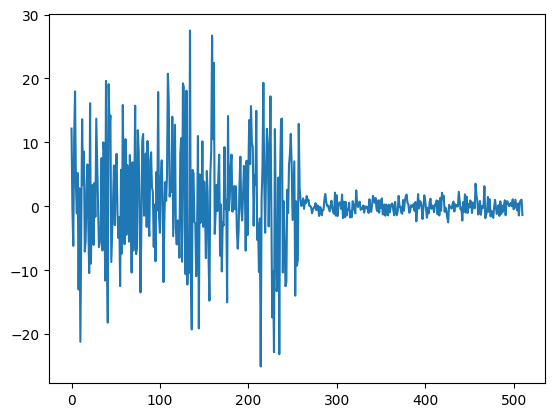

In [287]:
plt.plot(coeff_set[0,:])

In [327]:
import scipy.linalg


training_vectors = coeff_set @ Av  # generate training vectors from coefficients, shape [num_samples, dim(x)]

# normalize training vectors
training_vectors = np.diag(1 / scipy.linalg.norm(training_vectors, ord = 2, axis = 1)) @ training_vectors

np.save(f"{matrix_fn}_training.npy", training_vectors)

In [214]:
# is_fluid = domain == False  # Boolean mask for fluid cells(false are where cells are fluid)

# index_map = -1 * np.ones_like(domain, dtype=int)  

# arr_idx = 0
# for k in range(0, lz):
#     for j in range(0, ly):
#         for i in range(0, lx):
#             if(is_fluid[i, j, k]):
#                 index_map[i, j, k] = arr_idx
#                 arr_idx += 1    

# # initialize 'A' matrix: cells within bulk that are solid reduce the 'effective' 
# # domain on which the Pressure Poisson Equation is solved
# A_size = arr_idx
# A = np.zeros((A_size,A_size))


# # iterate over all points in 3d grid
# for k in range(0, lz):
#     for j in range(0, ly):
#         for i in range(0, lx): 
#             # skip all cells that are not fluid cells


#             row = index_map[i, j, k]
#             col = row
#             if(index_map[i, j, k] == -1):
#                 continue
#             # if(is_boundary(i, j, k)):
#             #     A[row, col] = 0    
#             #     continue
#             A[row, col] = 6
            
#             # impose neumann boundary conditions
#             if(not is_boundary(i + 1, j, k)):
#                 A[row, index_map[i + 1, j, k]] = -1
#             else:
#                 A[row,col] -= 1

#             if(not is_boundary(i - 1, j, k)):
#                 A[row, index_map[i - 1, j, k]] = -1
#             else:
#                 A[row,col] -= 1

#             if(not is_boundary(i, j + 1, k)):
#                 A[row, index_map[i, j + 1, k]] = -1
#             else:
#                 A[row,col] -= 1

#             if(not is_boundary(i, j - 1, k)):
#                 A[row, index_map[i, j - 1, k]] = -1
#             else:
#                 A[row,col] -= 1
            
#             if(not is_boundary(i, j, k + 1)):
#                 A[row, index_map[i, j, k + 1]] = -1
#             else:
#                 A[row,col] -= 1
            
#             if(not is_boundary(i, j, k - 1)):
#                 A[row, index_map[i, j, k - 1]] = -1
#             else:
#                 A[row,col] -= 1

#             if(A[row, col] == 0):
#                 A[row, col] = 1

            
# # A = A + A.T - np.diag(np.diag(A)) # symmetrize A
# print("Poisson Equation Matrix Complete") 

# # eps = 0
# # A = A + np.eye(A.shape[0]) * eps

# pA = np.eye(lx * ly * lz, lx * ly * lz)
# pA[:A.shape[0], :A.shape[1]] = A
# pA = scipy.sparse.coo_matrix(pA)
# sA = scipy.sparse.coo_matrix(A)        

Poisson Equation Matrix Complete


In [26]:
# helpers
def grid_to_row_col(i:int,j:int,k:int) -> int:
    return i + lx * j + lx * ly * k
def is_boundary(i, j, k): # check if cell belongs to the boundary
    if(i == -1 or i == lx or j == -1 or j == ly or k == -1 or k == lz):
        return True
    elif(domain[i, j, k] == True):
        return True
    
    return False

def icholesky(A):
    n = A.shape[0]

    for i in range(n):
        A[i,i] = np.sqrt(A[i,i])
        nz, = A[i + 1:, i].nonzero()
        if(len(nz) > 0):
            nz = nz + (i + 1)
            A[nz, i] = A[nz,i]/A[i,i]
        
        for j in nz:
            A[j:n, j] = A[j:n, j] - A[j:n, i] * A[j, i]
        
    return np.tril(A)


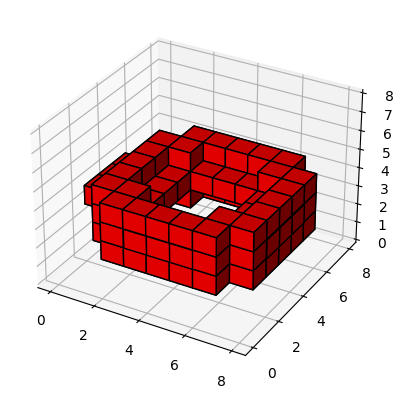

In [211]:
lx, ly, lz = 8, 8, 8
training = False # true for train set, false for test set

boundary_type = "torus"
filling_fraction = 0.35 # percentage of array filled
# prepare some coordinates
x, y, z = np.indices((lx, ly, lz))

cube_small = (x > int(lx/4)) & (x < int(lx * 3/4) + 1) & (y > int(ly/4)) & (y < int(ly * 3/4) + 1) & (z > int(lz/4)) & (z < int(lz * 3/4) + 1)
cube = (x > int(lx/8)) & (x < int(lx * 6/8)) & (y > int(ly/8)) & (y < int(ly * 6/8)) & (z > int(lz/8)) & (z < int(lz * 6/8))
sphere = np.square(x - int(lx/2) + 1) + np.square(y - int(ly/2) + 1) + np.square(z - int(lz/2) + 1) < 3/4 * np.sqrt(np.sum(np.square([lx,ly,lz])))
torus = np.square(int(lx/2) - 1 - np.sqrt(np.square(x - int(lx/2)) + 
        np.square(y - int(ly/2) + 1)))+ np.square(z - int(lz/2) + 1) <= 0.1 * np.sqrt(np.sum(np.square([lx,ly,lz])))

# combine the objects into a single boolean array
if(boundary_type == "torus"):
    domain = torus
elif(boundary_type == "sphere"):
    domain = sphere
elif(boundary_type == "cube"):
    domain = cube
elif(boundary_type == "cube_small"):
    domain = cube_small
elif(boundary_type == "random"):
    domain = np.zeros(lx * ly * lz)

    # Value to fill with
    fill_value = True
    # Calculate the number of elements to fill
    num_elements = int(domain.shape[0] * filling_fraction)

    # Generate random indices to fill
    idx = np.random.choice(domain.shape[0], num_elements,replace=False) 
    domain[idx] = True
    print(domain.shape)
    domain = domain.reshape((lx, ly, lz)).astype(bool)
    
else:
    domain = np.zeros((lx, ly, lz)).astype(bool)



colors = np.empty(domain.shape, dtype=object)
colors[domain] = 'red'
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(domain, facecolors=colors, edgecolor='k')

plt.show()
if(boundary_type != ""):
    if(boundary_type == "random"):
        boundary_type = boundary_type + "_ff_" + str(filling_fraction)
    ax.get_figure().savefig(f"./geometries/{boundary_type}_boundary_{lx}_{ly}_{lz}.png")


In [212]:
print(np.sum(domain)/512)

0.17578125


## Discretize Poisson Problem(Non-Sparse Version)


In [191]:
is_fluid = domain == False  # Boolean mask for fluid cells(false are where cells are fluid)

index_map = -1 * np.ones_like(domain, dtype=int)  

arr_idx = 0
for k in range(0, lz):
    for j in range(0, ly):
        for i in range(0, lx):
            if(is_fluid[i, j, k]):
                index_map[i, j, k] = arr_idx
                arr_idx += 1    

# initialize 'A' matrix: cells within bulk that are solid reduce the 'effective' 
# domain on which the Pressure Poisson Equation is solved
A_size = arr_idx
A = np.zeros((lx*ly*lz,lx*ly*lz))


# iterate over all points in 3d grid
for k in range(0, lz):
    for j in range(0, ly):
        for i in range(0, lx): 
            # skip all cells that are not fluid cells


            row = grid_to_row_col(i, j, k)
            col = row
            # if(index_map[i, j, k] == -1):
            #     continue
            if(is_boundary(i, j, k)):
                A[row, col] = 0 
                continue
            A[row, col] = 6
            
            # impose neumann boundary conditions
            if(not is_boundary(i + 1, j, k)):
                A[row, grid_to_row_col(i + 1, j, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i - 1, j, k)):
                A[row, grid_to_row_col(i - 1, j, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i, j + 1, k)):
                A[row, grid_to_row_col(i, j + 1, k)] = -1
            else:
                A[row,col] -= 1

            if(not is_boundary(i, j - 1, k)):
                A[row, grid_to_row_col(i, j - 1, k)] = -1
            else:
                A[row,col] -= 1
            
            if(not is_boundary(i, j, k + 1)):
                A[row, grid_to_row_col(i, j, k + 1)] = -1
            else:
                A[row,col] -= 1
            
            if(not is_boundary(i, j, k - 1)):
                A[row, grid_to_row_col(i, j, k - 1)] = -1
            else:
                A[row,col] -= 1

            if(A[row, col] == 0):
                A[row, col] = 1

            
# A = A + A.T - np.diag(np.diag(A)) # symmetrize A
print("Poisson Equation Matrix Complete") 

# eps = 0
# A = A + np.eye(A.shape[0]) * eps

pA = np.eye(lx * ly * lz, lx * ly * lz)
pA[:A.shape[0], :A.shape[1]] = A
pA = scipy.sparse.coo_matrix(pA)
sA = scipy.sparse.coo_matrix(A)       

Poisson Equation Matrix Complete


In [192]:


matrix_fn = f"A_matrix_{lx}_{ly}_{lz}_{boundary_type}"
scipy.sparse.save_npz(f"./data/{matrix_fn}.npz", pA)


In [193]:
import scipy.linalg
m = lx * ly * lz


Ae, Av = map(np.real, scipy.linalg.eigh(sA.toarray()))
# reorder eigen values 
ind = np.argsort(Ae)
Ae, Av = Ae[ind], Av.T[ind, :] # the rows are now eigenvectors
ev_threshold = 1e-14
condition = Ae >= ev_threshold
first_index = np.argmax(condition) if np.any(condition) else -1

if(first_index > 0):
    nullspace = Av[:first_index, :].T
    # Av = Av - Av @ nullspace, nullspace

last_index = min(first_index + m, Av.shape[0])
Ae, Av = Ae[first_index:last_index], Av[first_index:last_index, :]



Largest Eigenvalue:  9.540023670768875
Last Element:  9.540023670768875
Last Eigenvector Rayleigh quotient:  9.540023670768877

Smallest Eigenvalue:  0.0408755050489061
First Element:  0.0408755050489061
Last Eigenvector Rayleigh quotient:  0.04087550504890647



Text(0.5, 1.0, 'Eigenvalues of A')

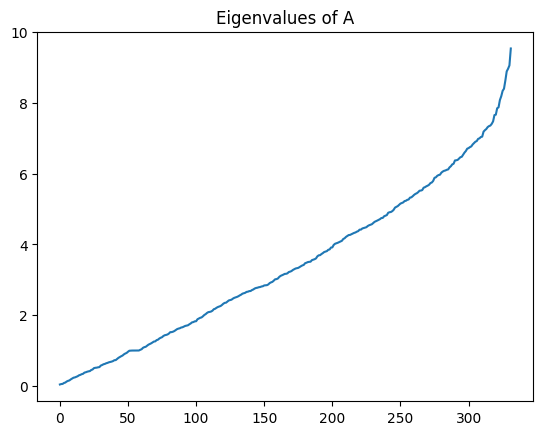

In [194]:
# sanity check that eigenvalues are in smallest to largest
print("Largest Eigenvalue: ", np.amax(Ae))
print("Last Element: ", Ae[-1])
v = Av[-1, :]
e = Ae[-1]
rq = (v @ A @ v) / (v @ v)
print("Last Eigenvector Rayleigh quotient: ", rq, end = 2*"\n")


print("Smallest Eigenvalue: ", np.amin(Ae))
print("First Element: ", Ae[0])
v = Av[0, :]
e = Ae[0]
rq = (v @ A @ v) / (v @ v)
print("Last Eigenvector Rayleigh quotient: ", rq, end = 2*"\n")


plt.plot(Ae)
plt.title("Eigenvalues of A")

In [195]:
import scipy.stats

num_vectors = 20000 # dataset vectors
theta = 25
m = Ae.shape[0] # total number of coefficients

coeff_set = np.zeros((num_vectors, m))

cutoff = int(m * 0.5 + theta)
loc = 0
scale = 1

for i in range(num_vectors):
   


    x_large = 9 * scipy.stats.norm.rvs(loc, scale, cutoff) 
    x = scipy.stats.norm.rvs(loc, scale, int(m - cutoff)) 

    coeff = np.concatenate((x_large, x))
    coeff_set[i, :] = coeff    
    if(i % 100 == 0):
        print(f"{i} vectors generated")


0 vectors generated
100 vectors generated


200 vectors generated
300 vectors generated
400 vectors generated
500 vectors generated
600 vectors generated
700 vectors generated
800 vectors generated
900 vectors generated
1000 vectors generated
1100 vectors generated
1200 vectors generated
1300 vectors generated
1400 vectors generated
1500 vectors generated
1600 vectors generated
1700 vectors generated
1800 vectors generated
1900 vectors generated
2000 vectors generated
2100 vectors generated
2200 vectors generated
2300 vectors generated
2400 vectors generated
2500 vectors generated
2600 vectors generated
2700 vectors generated
2800 vectors generated
2900 vectors generated
3000 vectors generated
3100 vectors generated
3200 vectors generated
3300 vectors generated
3400 vectors generated
3500 vectors generated
3600 vectors generated
3700 vectors generated
3800 vectors generated
3900 vectors generated
4000 vectors generated
4100 vectors generated
4200 vectors generated
4300 vectors generated
4400 vectors generated
4500 vectors genera

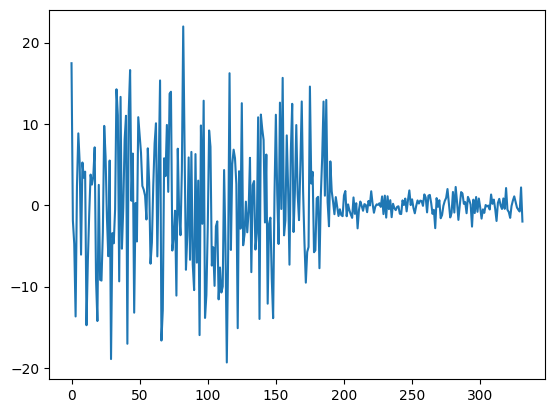

In [196]:
plt.plot(coeff_set[0,:])

In [197]:
import scipy.linalg


dataset = coeff_set @ Av  # generate vectors from coefficients, shape [num_samples, dim(x)]

if(boundary_type == "zero_flux"):
    # subtract out the mean to meet the compatibility condition
    dataset = dataset - np.mean(dataset, axis = 1)[:, np.newaxis]

# normalize vectors
dataset = np.diag(1 / scipy.linalg.norm(dataset, ord = 2, axis = 1)) @ dataset

# zero pad the training vectors


if(training):
    # dataset = np.concatenate((Av, dataset))
    # dataset = np.pad(dataset, ((0,0),(0,lx * ly * lz - A_size)), mode = "constant", constant_values=(0,0))
    dataset = dataset.astype(np.float64)
    np.save(f"./data/{matrix_fn}_training.npy", dataset)
else:
    # dataset = np.pad(dataset, ((0,0),(0,lx * ly * lz - A_size)), mode = "constant", constant_values=(0,0))
    dataset = dataset.astype(np.float64)
    np.save(f"./data/{matrix_fn}_data.npy", dataset)

In [198]:
print(A.shape)

(512, 512)


In [199]:

# # off of stack overflow, i dont trust it
def _icholesky(a):
    n = a.shape[0]
    for k in range(n): 
        a[k,k] = np.sqrt(a[k,k])
        i_, = a[k+1:,k].nonzero() 
        if len(i_) > 0:
            i_= i_ + (k+1)
            a[i_,k] = a[i_,k]/a[k,k]
        for j in i_: 
            i2_, = a[j:n,j].nonzero()
            if len(i2_) > 0:
                i2_ = i2_ + j
                a[i2_,j]  = a[i2_,j] - a[i2_,k]*a[j,k]   


    return np.tril(a)

# M = np.tril(icholesky(sA.toarray()))


def icholesky(A):
    n = A.shape[0]

    for i in range(n):
        A[i,i] = np.sqrt(A[i,i])
        nz, = A[i + 1:, i].nonzero()
        if(len(nz) > 0):
            nz = nz + (i + 1)
            A[nz, i] = A[nz,i]/A[i,i]
        
        for j in nz:
            k, = A[j:n,j].nonzero()
            if(len(k) > 0):
                k = k + j
                A[k, j] = A[k, j] - A[k, i] * A[j, i]
        
    return np.tril(A)

# R = icholesky(A.copy()) - _icholesky(A.copy())

# print(R)



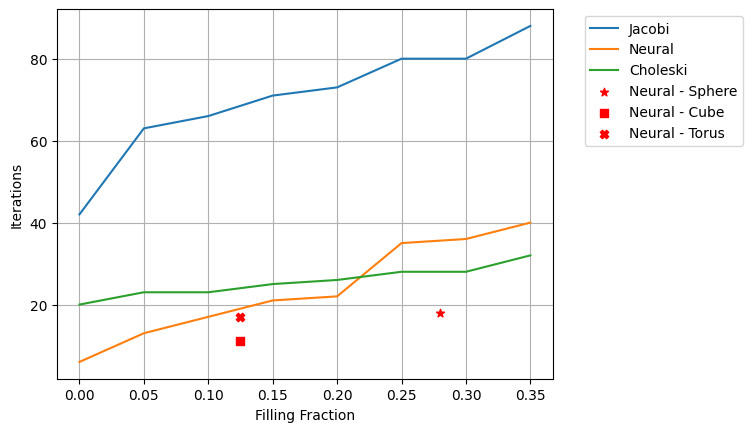

In [220]:
p, n, i = [42,63,66,71,73,80, 80,88],[6,13,17,21,22,35,36,40],[20,23,23,25,26,28,28, 32]
x = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

xs, s = [0.28], [18]
xc, c = [0.125],[11]
xt, t = [0.176, 17]


plt.plot(x, p, label = "Jacobi")
plt.plot(x, n, label = "Neural")
plt.plot(x, i, label = "Choleski")
plt.scatter(xs, s, label = "Neural - Sphere", marker = "*", c = "r")
plt.scatter(xc, c, label = "Neural - Cube", marker = "s", c = "r")
plt.scatter(xc, t, label = "Neural - Torus", marker  = "X", c = "r")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Iterations")
plt.xlabel("Filling Fraction")
plt.grid()


In [221]:
0.096/0.087

1.1034482758620692